In [1]:
import torch
import torchaudio
import PIL.Image
from datasets import load_dataset, Audio
from IPython import display
from torchvision.transforms.v2 import PILToTensor, ToPILImage

In [2]:
audioset20k = load_dataset("danjacobellis/audioset_opus_24kbps_balanced",split='train').cast_column('opus', Audio(decode=False))
imagenet1k = load_dataset('danjacobellis/imagenet_288_webp',split='train')

Resolving data files:   0%|          | 0/66 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/66 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/66 [00:00<?, ?it/s]

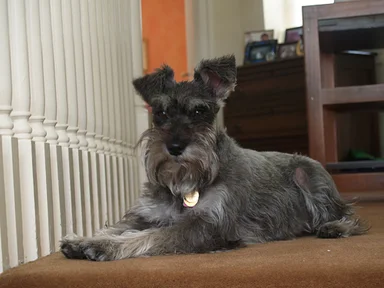

In [3]:
x_audio, fs = torchaudio.load(audioset20k[0]['opus']['bytes'],normalize=False);
assert x_audio.shape[1]==483840; assert fs==48000
assert x_audio.min() >= -1.0; assert x_audio.max() <= 1.0
display.display(display.Audio(x_audio, rate=fs))
x_image = PILToTensor()(imagenet1k[0]['webp'])/255 - 0.5
assert x_image.min() >= -1.0; assert x_image.max() <= 1.0
assert x_image.shape[0] == 3; assert x_image.shape[1] >= 288; assert x_image.shape[2] >= 288
display.display(ToPILImage()(x_image+0.5))

In [178]:
def shrink_1d(x, batch=False):
    if not batch:
        x = x.unsqueeze(0)
    ℓ = x.shape[2]
    s = 0.25*torch.rand(1).item()
    if torch.rand(1).item()<0.5:
        x = torch.nn.CircularPad1d(padding=int(ℓ*s))(x)
    else:
        x = torch.nn.ReflectionPad1d(padding=int(ℓ*s))(x)
    x = torch.nn.functional.interpolate(x,ℓ,mode='linear')
    if not batch:
        x = x[0]
    return x
display.display(display.Audio(shrink_1d(x_audio), rate=fs))

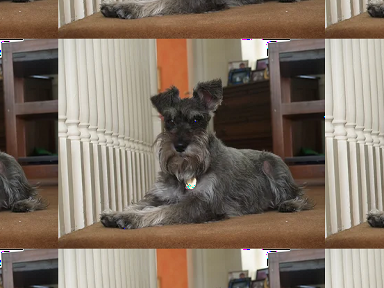

In [188]:
def shrink_2d(x, batch=False):
    if not batch:
        x = x.unsqueeze(0)
    h = x.shape[2]; w = x.shape[3]
    sh = 0.5*torch.rand(1).item(); T = int(h*sh)//2; B = int(h*sh) - T
    sw = 0.5*torch.rand(1).item(); L = int(w*sw)//2; R = int(w*sw) - L
    if torch.rand(1).item()<0.5:
        x = torch.nn.CircularPad2d(padding=(L,R,T,B))(x)
    else:
        x = torch.nn.ReflectionPad2d(padding=(L,R,T,B))(x)
    x = torch.nn.functional.interpolate(x,(h,w),mode='bicubic')
    if not batch:
        x = x[0]
    return x

display.display(ToPILImage()(shrink_2d(x_image)+0.5))